In [68]:
import os
import csv

In [69]:
class Student:
    def __init__(self, sid, name, address):
        self.sid = sid
        self.name = name
        self.address = address
        self.grades = {}

    def add_grade(self, module, grade):
        self.grades[module] = grade

    def get_average_grade(self):
        if len(self.grades) == 0:
            return 0
        return sum(self.grades.values()) / len(self.grades)

    def get_grades(self):
        return self.grades

In [70]:
class StudentDatabase:
    def __init__(self, file_path):
        self.file_path = file_path
        self.students = {}
        self.load_data()

    def load_data(self):
        if not os.path.isfile(self.file_path):
            return
        with open(self.file_path, 'r') as f:
            lines = f.readlines()
        for line in lines:
            parts = line.strip().split(' ')
            sid, first_name, last_name, *address_parts = parts
            name = f"{first_name} {last_name}"
            address = ' '.join(address_parts)
            student = Student(sid, name, address)
            self.students[sid] = student

        # load grades from separate files
        programming_file = "gradesprogramming.txt"
        digital_file = "gradesdigital.txt"
        if os.path.isfile(programming_file):
            module = "programming"
            with open(programming_file, 'r') as f:
                programming_grades = f.readlines()
            for grade in programming_grades:
                sid, value = grade.strip().split(' ')
                self.add_grade(sid,module, int(value))
        if os.path.isfile(digital_file):
            module = "digital"
            with open(digital_file, 'r') as f:
                digital_grades = f.readlines()
            for grade in digital_grades:
                sid, value = grade.strip().split(' ')
                self.add_grade(sid,module, int(value))
    
    def save_data(self):
        with open('student_data.txt', 'w') as f:
            for sid, student in self.students.items():
                f.write(f"{sid} {student.name} {student.address}\n")

        programming_file = "gradesprogramming.txt"
        with open(programming_file, 'w') as fp:
            for sid, student in self.students.items():
                grades = student.get_grades()
                for module, grade in grades.items():
                    if(module == 'programming'):                  
                            fp.write(f"{sid} {grade}\n")
        
        programming_file = "gradesdigital.txt"
        with open(programming_file, 'w') as fd:
            for sid, student in self.students.items():
                grades = student.get_grades()
                for module, grade in grades.items():
                    if(module == 'digital'):                  
                            fd.write(f"{sid} {grade}\n")
                            
        # Open the files for reading
        with open('student_data.txt', 'r') as f:
            student_data = f.readlines()

        with open('gradesprogramming.txt', 'r') as fp:
            programming_data = fp.readlines()

        with open('gradesdigital.txt', 'r') as fd:
            digital_data = fd.readlines()

        # Open a new file for writing CSV
        with open('all_data.csv', 'w', newline='') as fw:
            writer = csv.writer(fw)
            # Write the header row
            writer.writerow(['StudentData', 'Name', 'Address', 'ProgrammingGrade', 'DigitalGrade'])
            # Write the data rows
            for i,line in enumerate(student_data):
                parts = line.strip().split(' ')
                sid, first_name, last_name, *address_parts = parts
                name = f"{first_name} {last_name}"
                address = ' '.join(address_parts)
                pid, programming_grade = programming_data[i].strip().split()
                did, digital_grade = digital_data[i].strip().split()
                writer.writerow([sid, name, address, programming_grade, digital_grade])

    def add_student(self, sid, name, address):
        if sid in db.students:
            print("ID exists already\n")
            return
        student = Student(sid, name, address)
        self.students[sid] = student

    def remove_student(self, sid):
        if sid in self.students:
            del self.students[sid]

    def modify_student(self, sid, name=None, address=None):
        if sid in self.students:
            student = self.students[sid]
            if name:
                student.name = name
            if address:
                student.address = address

    def add_grade(self, sid, module, grade):
        if sid in self.students:
            student = self.students[sid]
            student.add_grade(module, grade)

    def get_average_grade(self, sid):
        if sid in self.students:
            student = self.students[sid]
            return student.get_average_grade()
        return 0

    def get_grades(self, sid):
        if sid in self.students:
            student = self.students[sid]
            return student.get_grades()
        return {}


    def plot_grade_distribution(self, module):
        import matplotlib.pyplot as plt
        import numpy as np
        from scipy import stats
        grades = []
        for sid, student in self.students.items():
            if module in student.grades:
                grades.append(student.grades[module])

        # Plot PDF
        plt.subplot(2, 1, 1)
        plt.hist(grades, bins=range(0, 101, 10), density=True, alpha=0.5, label='PDF')
        plt.plot(np.linspace(0, 100, 1000), stats.norm.pdf(np.linspace(0, 100, 1000), np.mean(grades), np.std(grades)), label='Normal Distribution')
        plt.xlabel('Grade')
        plt.ylabel('Probability Density')
        plt.title(f'Distribution of grades for module {module}')
        plt.legend()
        plt.show()

        # Plot CDF
        plt.subplot(2, 1, 2)
        plt.hist(grades, bins=range(0, 101, 10), density=True, cumulative=True, alpha=0.5, label='CDF')
        plt.plot(np.linspace(0, 100, 1000), stats.norm.cdf(np.linspace(0, 100, 1000), np.mean(grades), np.std(grades)), label='Normal Distribution')
        plt.xlabel('Grade')
        plt.ylabel('Cumulative Probability')
        plt.legend()

        plt.show()


What do you want to do?
1. Print student data
2. Add student
3. Remove student
4. Modify student data
5. Add grade
6. Calculate average grade
7. Plot grade distribution
8. Save data to file
9. Quit
-> Enter your choice (1-9): 1
-> Enter student ID (xxxxxx): 125001

+---------------------------ID: 125001---+

*Name      : John Smith
*Address   : 12 First Road London N1
 Grades    
*programming: 74
*digital: 55

+---------------------------------------+

What do you want to do?
1. Print student data
2. Add student
3. Remove student
4. Modify student data
5. Add grade
6. Calculate average grade
7. Plot grade distribution
8. Save data to file
9. Quit
-> Enter your choice (1-9): 2
-> Enter student ID (xxxxx): 125011
-> Enter student name (FirstName LastName): Fiza Ahmad
-> Enter student address : G10 6
ID exists already


What do you want to do?
1. Print student data
2. Add student
3. Remove student
4. Modify student data
5. Add grade
6. Calculate average grade
7. Plot grade distribution
8

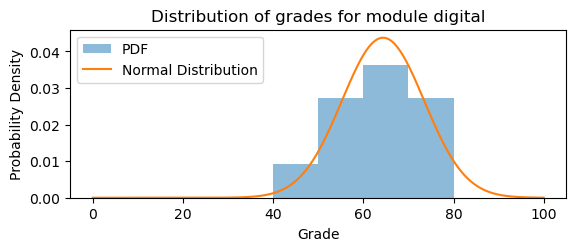

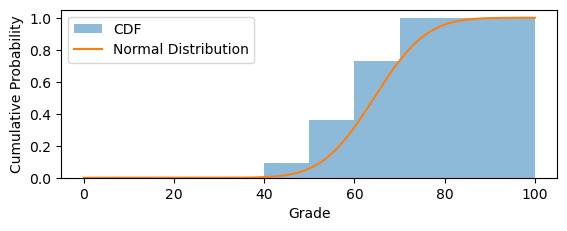


What do you want to do?
1. Print student data
2. Add student
3. Remove student
4. Modify student data
5. Add grade
6. Calculate average grade
7. Plot grade distribution
8. Save data to file
9. Quit
-> Enter your choice (1-9): 8
Data saved successfully

What do you want to do?
1. Print student data
2. Add student
3. Remove student
4. Modify student data
5. Add grade
6. Calculate average grade
7. Plot grade distribution
8. Save data to file
9. Quit
-> Enter your choice (1-9): 9


In [71]:
db = StudentDatabase('student_data.txt')

while True:
    print('\nWhat do you want to do?')
    print('1. Print student data')
    print('2. Add student')
    print('3. Remove student')
    print('4. Modify student data')
    print('5. Add grade')
    print('6. Calculate average grade')
    print('7. Plot grade distribution')
    print('8. Save data to file')
    print('9. Quit')

    choice = input('-> Enter your choice (1-9): ')
    if choice == '1':
        sid = input('-> Enter student ID (xxxxxx): ')
        if sid in db.students:
            student = db.students[sid]
            print(f'\n+---------------------------ID: {student.sid}---+')
            print(f'\n*Name      : {student.name}')
            print(f'*Address   : {student.address}')
            grades = student.get_grades()
            if len(grades) > 0:
                print(' Grades    ')
                for module, grade in grades.items():
                    print(f'*{module}: {grade}')
            print('\n+---------------------------------------+')
        else:
            print('Student not found')
    elif choice == '2':
        sid = input('-> Enter student ID (xxxxx): ')
        name = input('-> Enter student name (FirstName LastName): ')
        address = input('-> Enter student address : ')
        db.add_student(sid, name, address)
    elif choice == '3':
        sid = input('-> Enter student ID (xxxxx): ')
        db.remove_student(sid)
    elif choice == '4':
        sid = input('-> Enter student ID (xxxxx): ')
        name = input('-> Enter student name (leave blank to keep current value): ')
        address = input('-> Enter student address (leave blank to keep current value): ')
        db.modify_student(sid, name, address)
    elif choice == '5':
        sid = input('-> Enter student ID (xxxxx): ')
        module = input('-> Enter module (programming/digital): ')
        grade = input('-> Enter grade (e.g 75, 45): ')
        db.add_grade(sid, module, int(grade))
    elif choice == '6':
        sid = input('-> Enter student ID (xxxxx): ')
        average_grade = db.get_average_grade(sid)
        print(f'-> Average grade: {average_grade}')
    elif choice == '7':
        module = input('-> Enter module (programming/digital): ')
        db.plot_grade_distribution(module)
    elif choice == '8':
        db.save_data()
        print('Data saved successfully')
    elif choice == '9':
        break
    else:
        print('Invalid choice')
